<h1 style="color: #E50914;text-align: center;">NETFLIX CASE STUDY</h1>

### Problem Statement
"Netflix wants to improve its content recommendation system and make data-driven decisions to enhance user experience and engagement."
#### Basic Metrics
1. **Content Distribution:**
     - Movies vs. TV Shows: Analyze the distribution of content between movies and TV shows. Calculate the percentage of movies and TV shows in the dataset.
2. **Country of Production:**
     - Explore the countries where the movies and TV shows were produced. Identify the top countries with the most content in the Netflix library.
3. **Release Year Analysis:**
     - Analyze the distribution of content by release year. Identify the most common release years and trends in the dataset.
4. **TV Ratings:**
     - Examine the distribution of TV ratings for the content. Calculate the frequency of each TV rating category (e.g., G, PG, TV-MA) in the dataset.
5. **Content Duration:**
     - For movies, calculate the distribution of movie durations in minutes (e.g., 90 minutes, 120 minutes). For TV shows, calculate the distribution of the number of seasons.
6. **Genre Analysis:**
     - Analyze the distribution of content across different genres listed in the "Listed_in" column. Identify the most popular genres on Netflix.
7. **Content Added Over Time:**
     - Examine how content has been added to Netflix over time. Create a time series analysis of content additions by year and month.
8. **Director and Cast Analysis:**
     - Identify the most prolific directors and actors/actresses in the Netflix library. Analyze their contributions to the platform.
9. **Content Descriptions:**
     - Perform text analysis on the descriptions to identify common keywords or themes. This could help with content tagging and recommendation.


    


### Importing the neccesary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Data Reading,

In [ ]:
data=pd.read_csv("/content/netflix.csv")

In [ ]:
# Shape of the Data:
print("Shape of the data : ", data.shape)

Shape of the data :  (8807, 12)


In [ ]:
# Data types
data_types = data.dtypes
print("Data types :")
print(data_types)

Data types :
show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [ ]:
# Conversion of Categorical Attributes
catergorical_attributes = ['type', 'country', 'rating', 'listed_in']
for category in catergorical_attributes:
    data[category] = data[category].astype('category')

In [ ]:
# Missing values detection
missing_values = data.isnull().sum()
print("Missing Value Detection:")
print(missing_values)

Missing Value Detection:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Statistical Summary
# 1. Numerical summary : Summary of all numerical columns
numerical_summary = data.describe()

numerical_summary

categorical_summary = data[catergorical_attributes].describe()

print('categorical_summary: ')
categorical_summary


categorical_summary: 


,type,country,rating,listed_in
count,8807,7976,8803,8807
unique,2,748,17,514
top,Movie,United States,TV-MA,"Dramas, International Movies"
freq,6131,2818,3207,362


In [ ]:
# Value counts for every categorical attribute
type_count = data['type'].value_counts()
print(f"Type Count: {type_count}")

Type Count: Movie      6131
TV Show    2676
Name: type, dtype: int64


In [ ]:
country_count = data['country'].value_counts().head(5)
print(f"Country count : {country_count}")

Country count : United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64


In [ ]:
rating_count = data['rating'].value_counts()
print(f"Rating count {rating_count}")

Rating count TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64


In [ ]:
listed_in_count=data["listed_in"].value_counts().head(5)
print(f"listed_in_count: {listed_in_count}")

listed_in_count: Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Name: listed_in, dtype: int64


In [ ]:
# unique values for Categorical attributes
type_unique=data["type"].nunique()
print(f"Unique type values : {type_unique}")

Unique type values : 2


In [ ]:
rating_unique=data["rating"].nunique()
print(f'Unique rating values : {rating_unique}')

Unique rating values : 17


In [ ]:
listed_in_unique=data["listed_in"].nunique()
print(f"Unique Listed_in values : {listed_in_unique}")

Unique Listed_in values : 514


**value_counts()** is used to calculate the frequency of each unique value in the 'Type' column, which indicates whether a title is a movie or TV show.

**unique()** is used to get an array of unique values in the 'Rating' column, providing a list of different content ratings available.

**nunique()** is used to count the number of unique values in the 'Country' column, indicating how many different countries are represented in the dataset.



In [ ]:
data_copy = data.copy()

### Pre-proccessing the data

In [ ]:
# Cast
constraint=data_copy['cast'].apply(lambda x: str(x).split(', ')).tolist()
data_new=pd.DataFrame(data=constraint,index=data["title"])
data_new=data_new.stack()
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new=data_new[["title",0]]
data_new

data_new.columns=['title','cast']
data_new
data_cast=data_copy.merge(data_new,on='title',how='inner')
data_cast.sample(10)

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
21362,s2692,TV Show,Brews Brothers,NaN,"Alan Aisenberg, Mike Castle, Carmen Flood, Mar...",United States,"April 10, 2020",2020,TV-MA,1 Season,TV Comedies,Two rival brothers must work together to keep ...,Marques Ray
49520,s6694,TV Show,Encerrados,NaN,"Luis Machín, Maria Merlino, Fabián Vena, Ana C...",NaN,"June 18, 2018",2018,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",This fictional series tells the stories of wha...,Ana Chalentano
14279,s1771,Movie,Wheels of Fortune,Shaun Paul Piccinino,"Matt Jones, Noureen DeWulf, John Ducey, Matty ...",United States,"November 1, 2020",2020,R,107 min,"Comedies, Sports Movies","To claim a big inheritance, a down-on-his-luck...",Christina Moore
19325,s2421,Movie,Choked: Paisa Bolta Hai,Anurag Kashyap,"Saiyami Kher, Roshan Mathew, Amruta Subhash, U...",India,"June 5, 2020",2020,TV-14,114 min,"Dramas, International Movies",A bank employee weighed down by her jobless hu...,Amruta Subhash
13237,s1634,Movie,The 2nd,Brian Skiba,"Ryan Phillippe, Casper Van Dien, Jack Griffo, ...",United States,"November 30, 2020",2020,TV-MA,93 min,Action & Adventure,A Secret Service agent is drawn into a terrori...,Samaire Armstrong
17667,s2196,Movie,It's Her Day,Aniedi Anwah,"Bovi Ugboma, Amanda Ebeye, Shaffy Bello, Adunn...",Nigeria,"July 29, 2020",2016,TV-MA,112 min,"Comedies, International Movies, Romantic Movies",After a man promises his fiancé a dream weddin...,Femi Durojaiye
41678,s5562,Movie,The Most Hated Woman in America,Tommy O'Haver,"Melissa Leo, Josh Lucas, Vincent Kartheiser, J...",United States,"March 24, 2017",2017,TV-MA,93 min,Dramas,This drama follows the controversial life of o...,Vincent Kartheiser
50640,s6851,Movie,Ghost Whispers,Kazuchika Kise,"Maaya Sakamoto, Ikkyu Juku, Kenichirou Matsuda...",Japan,"February 24, 2019",2013,TV-14,56 min,"Action & Adventure, Anime Features, Internatio...",Freed of her responsibilities for the 501 Orga...,Kazuya Nakai
55677,s7545,Movie,"My Schoolmate, the Barbarian","Siu-hung Chung, Wong Jing","Nicholas Tse, Stephen Fung, Joey Yung, Samuel ...",Hong Kong,"August 16, 2018",2001,TV-14,90 min,"Action & Adventure, Comedies, International Mo...",A brainy private school student is transferred...,Samuel Pang
57119,s7772,TV Show,Power Rangers RPM,NaN,"Eka Darville, Ari Boyland, Rose McIver, Milo C...",United States,"January 1, 2016",2009,TV-Y7,1 Season,Kids' TV,"The Power Rangers' new member, Dillon, isn't s...",Rose McIver


In [ ]:
data_new.columns=['title','cast']
data_new
data_cast=data_copy.merge(data_new,on='title',how='inner')
data_cast

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Manish Chaudhary
64947,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Meghna Malik
64948,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Malkeet Rauni
64949,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,Anita Shabdish


In [ ]:
# final pre-proccessed data
pre_Data = pd.read_csv('/content/Final_data.csv')


The data is pre-processed by splitting the 'Actor,' 'Director,' and 'Country' columns to create lists of values for each entry.

**Univariate analysis** is performed for the continuous variable 'Release_year' using a distribution plot (distplot).
Boxplots are created for the categorical variable 'Rating' to visualize its distribution.

**Bivariate analysis** is demonstrated by creating a count plot to visualize the relationship between 'Type' and 'Rating.'

Note that the 'Type' variable is categorical, and the correlation analysis (heatmap and pairplot) is not applicable in this context, as these plots are typically used for continuous variables.

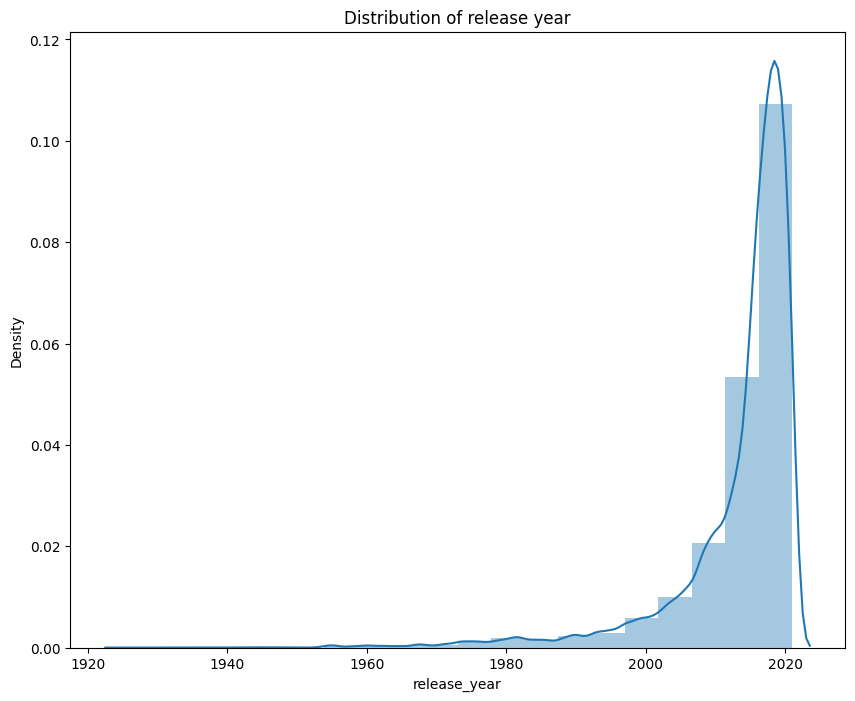

In [ ]:
# univariate analysis for continuous variables
# continuous variables : 'release_year'
plt.figure(figsize=(10, 8))
sns.distplot(pre_Data['release_year'], bins = 20, kde=True)
plt.title('Distribution of release year')
plt.show()

In [ ]:
pre_Data['date_added'] = pd.to_datetime(pre_Data['date_added'])

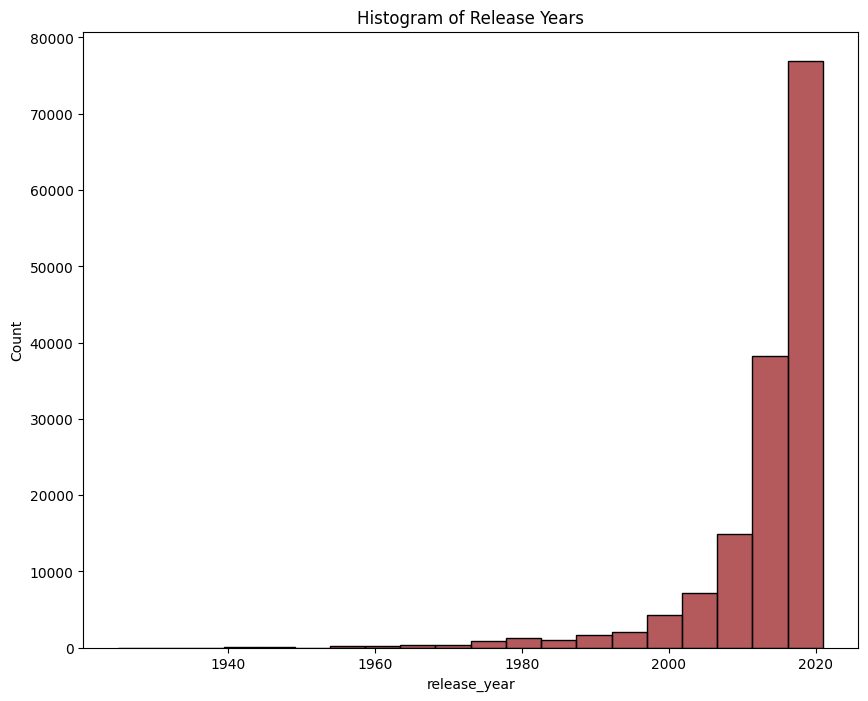

In [ ]:
# histogram for continuous variables
release_years = pre_Data['release_year']
plt.figure(figsize=(10, 8))
sns.histplot(release_years, bins = 20, color="#9B2226")
plt.title('Histogram of Release Years')
plt.show()

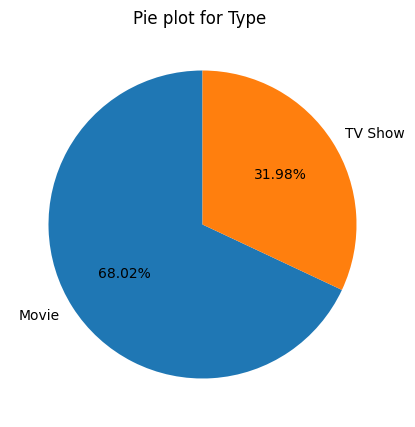

In [ ]:
#PIE PLOT
plt.figure(figsize=(5, 5))
type_count=pre_Data["type"].value_counts()
plt.pie(type_count,labels=type_count.index,autopct="%.2f%%",startangle=90)
plt.title("Pie plot for Type ")
plt.show()

In this example , we're using a pie plot to visualize the percentage of Movie and TV shows in the Netflix data

Checking for outliers often involves using descriptive statistics, data visualization, or statistical methods. **Box plots** and scatter plots can be helpful for visualizing outliers. Here's an example using a box plot to check for outliers in a numerical variable:

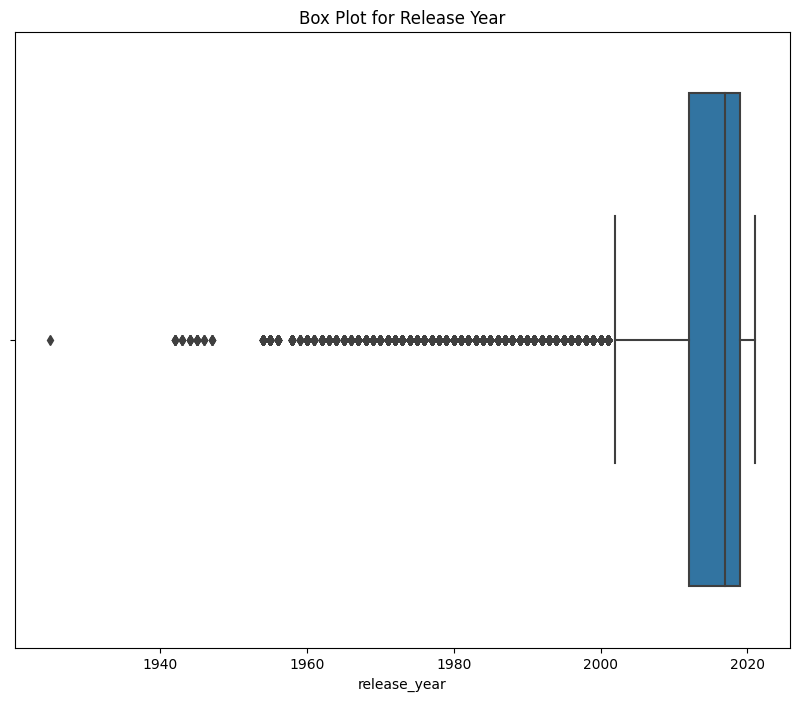

In [ ]:
# Categorical varibales
# 1.Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x=pre_Data['release_year'])
plt.title('Box Plot for Release Year')
plt.show()



In this example, we use a box plot to visualize the distribution of the 'Release_year' variable and identify potential outliers. Outliers are often represented as individual data points beyond the "whiskers" of the box plot.

Keep in mind that outlier treatment is context-dependent, and you may choose to remove outliers, transform the data, or apply other methods based on your specific analysis goals.

Remember that the treatment of missing values and outliers should be done carefully and in a way that is appropriate for your analysis and doesn't introduce bias or distort the data unnecessarily.



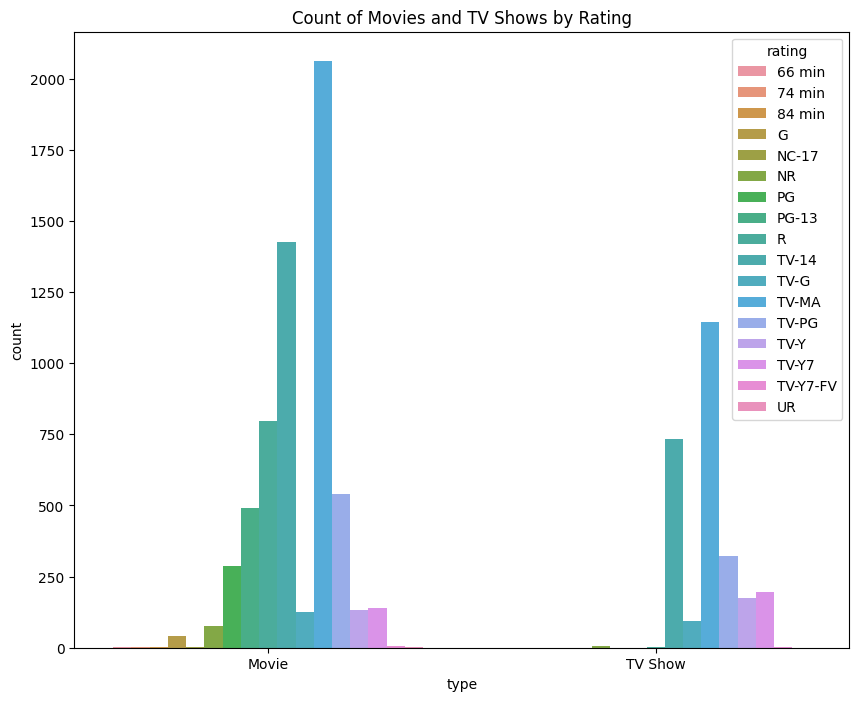

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x = 'type', hue='rating', data = data_copy)
plt.title('Count of Movies and TV Shows by Rating')
plt.show()


In this example, we're using a **count plot** to visualize the relationship between the content type ('Type') and the content rating ('Rating'). The hue parameter is used to differentiate the counts for different content ratings within each content type.


In [ ]:
data_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


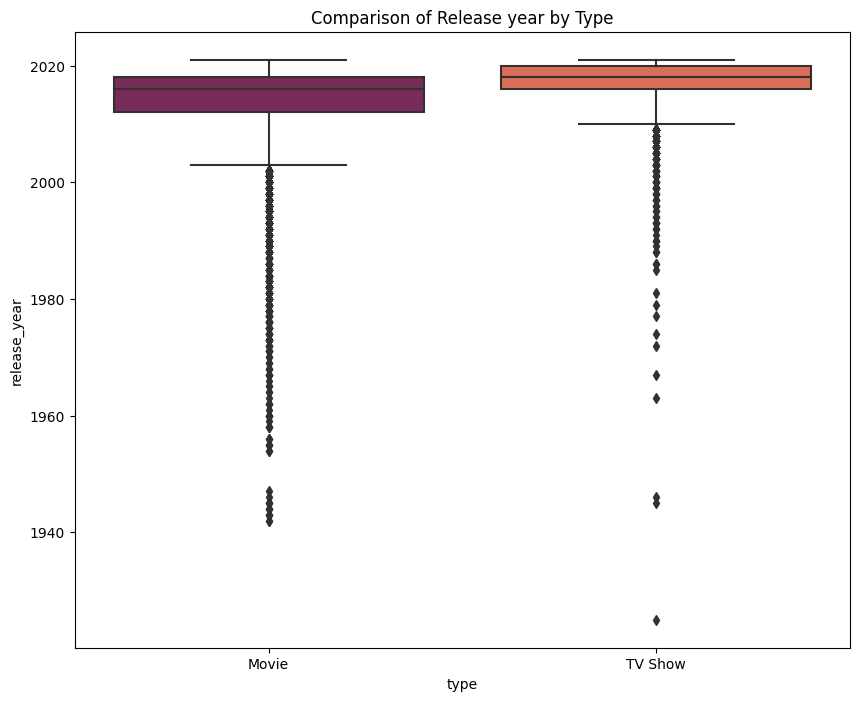

In [ ]:
plt.figure(figsize=(10, 8))
sns.boxplot(x = 'type', y='release_year', data = data_copy, palette='rocket')
plt.title('Comparison of Release year by Type')
plt.show()

In this example, we're using a box plot to compare the distribution of 'Release_year' by 'Type.' This allows you to see how the release years differ between movies and TV shows.


In [ ]:
pre_Data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,Month_added,Day_added,cast_y,genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,Saturday,NaN,Documentaries
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,International TV Shows
2,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,TV Dramas
3,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,TV Mysteries
4,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Khosi Ngema,International TV Shows


In [ ]:
d1=pre_Data[pre_Data["type"]=="Movie"]
constraint=d1['duration'].apply(lambda x: str(x).split(' ')).tolist()
data_new=pd.DataFrame(data=constraint,index=d1["title"])
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new=data_new[["title",0]]
data_new
data_new.columns=['title','mins']
data_new


,title,mins
0,Dick Johnson Is Dead,90
1,My Little Pony: A New Generation,91
2,My Little Pony: A New Generation,91
3,My Little Pony: A New Generation,91
4,My Little Pony: A New Generation,91
...,...,...
101687,Zubaan,111
101688,Zubaan,111
101689,Zubaan,111
101690,Zubaan,111


In [ ]:
dd=pre_Data.merge(data_new,on="title",how="left")

In [ ]:
dd

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,Month_added,Day_added,cast_y,genre,mins
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,Saturday,NaN,Documentaries,90
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,International TV Shows,NaN
2,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,TV Dramas,NaN
3,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,TV Mysteries,NaN
4,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Khosi Ngema,International TV Shows,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2482587,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March,Saturday,Chittaranjan Tripathy,Music & Musicals,111
2482588,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March,Saturday,Chittaranjan Tripathy,Music & Musicals,111
2482589,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March,Saturday,Chittaranjan Tripathy,Music & Musicals,111
2482590,s8807,Movie,Zubaan,Mozez Singh,India,2019-03-02,2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,March,Saturday,Chittaranjan Tripathy,Music & Musicals,111


In [ ]:
d1=data[data["type"]=="TV Show"]
constraint=d1['duration'].apply(lambda x: str(x).split(' ')).tolist()
data_new=pd.DataFrame(data=constraint,index=d1["title"])
data_new=pd.DataFrame(data_new)
data_new.reset_index(inplace=True)
data_new=data_new[["title",0]]
data_new
data_new.columns=['title','season']
data_new

,title,season
0,Blood & Water,2
1,Ganglands,1
2,Jailbirds New Orleans,1
3,Kota Factory,2
4,Midnight Mass,1
...,...,...
2671,Yu-Gi-Oh! Arc-V,2
2672,Yunus Emre,2
2673,Zak Storm,3
2674,Zindagi Gulzar Hai,1


In [ ]:
pre_Data1=dd.merge(data_new,on="title",how="left")

In [ ]:
pre_Data1.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,description,Month_added,Day_added,cast_y,genre,mins,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,"As her father nears the end of his life, filmm...",September,Saturday,NaN,Documentaries,90,NaN
1,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,International TV Shows,NaN,2
2,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,TV Dramas,NaN,2
3,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Ama Qamata,TV Mysteries,NaN,2
4,s2,TV Show,Blood & Water,Unknown,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",September,Friday,Khosi Ngema,International TV Shows,NaN,2


In [ ]:
pre_Data1["mins"]=pre_Data1["mins"].astype(float)
pre_Data1["mins"].fillna(pre_Data1["mins"].mean()).astype(int)

0           90
1          109
2          109
3          109
4          109
          ... 
2482587    111
2482588    111
2482589    111
2482590    111
2482591    111
Name: mins, Length: 2482592, dtype: int64

In [ ]:
pre_Data1["season"]

0          NaN
1            2
2            2
3            2
4            2
          ... 
2482587    NaN
2482588    NaN
2482589    NaN
2482590    NaN
2482591    NaN
Name: season, Length: 2482592, dtype: object

In [ ]:
pre_Data1["season"]=pre_Data1["season"].astype(float)

In [ ]:
pre_Data1["season"].fillna(pre_Data1["season"].mean()).astype(int)

0          1
1          2
2          2
3          2
4          2
          ..
2482587    1
2482588    1
2482589    1
2482590    1
2482591    1
Name: season, Length: 2482592, dtype: int64

**Correlation analysis** is typically used for numerical or continuous variables to measure the strength and direction of the linear relationship between them. In your Netflix dataset, there are limited numerical variables, so correlation analysis may not be suitable. However, if you want to analyze any numerical variables for correlations, you can use methods like Pearson's correlation coefficient.



We use the **.corr()** method to calculate the Pearson correlation coefficient between these two variables.


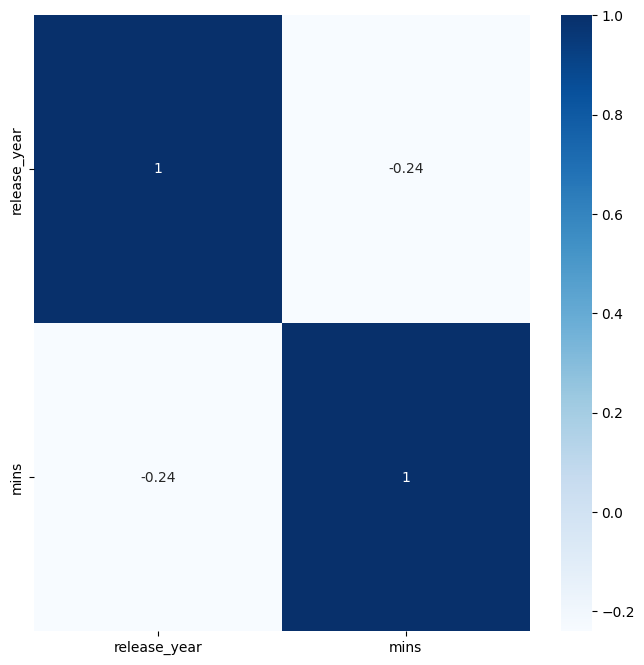

In [ ]:
#Correlation - HeatMap
plt.figure(figsize=(8, 8))
heat=pre_Data1[["release_year","mins"]]
sns.heatmap(heat.corr(),cmap="Blues",annot=True)
plt.show()

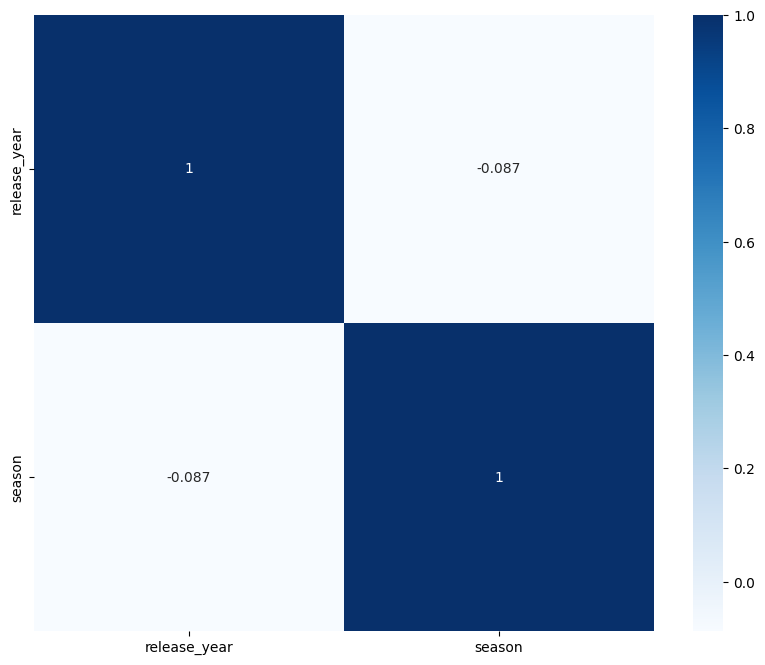

In [ ]:
plt.figure(figsize=(8, 8))
heat=pre_Data1[["release_year","season"]]
sns.heatmap(heat.corr(),cmap="Blues",annot=True)
plt.show()

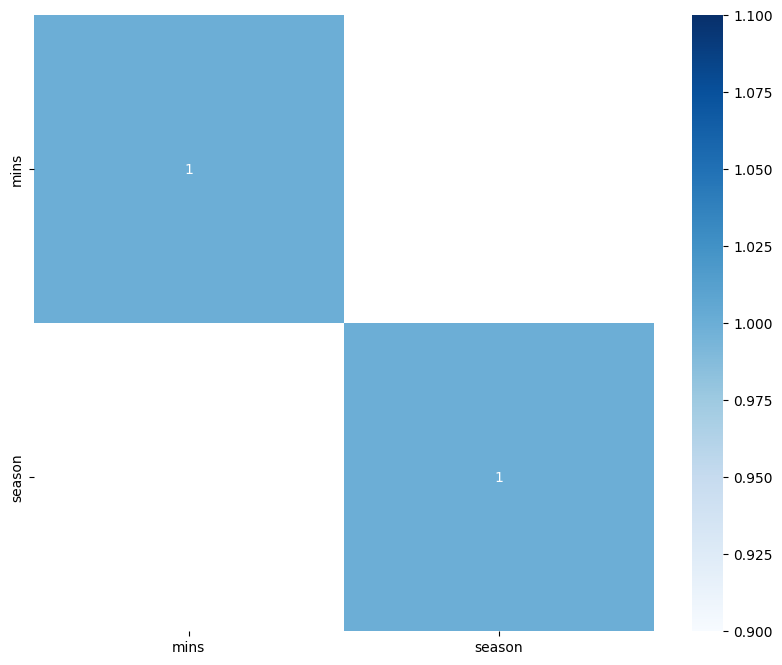

In [ ]:
plt.figure(figsize=(8, 8))
heat=pre_Data1[["mins","season"]]
sns.heatmap(heat.corr(),cmap="Blues",annot=True)
plt.show()

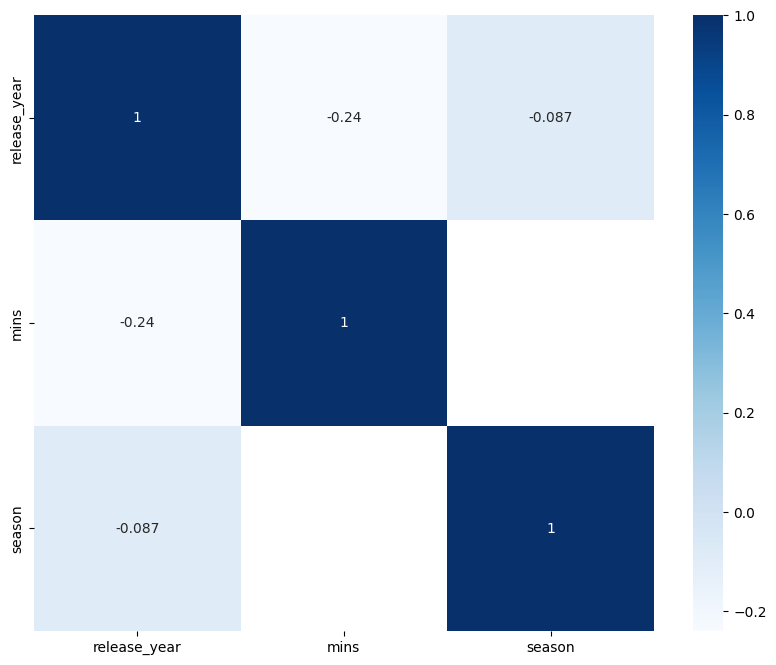

In [ ]:
plt.figure(figsize=(8, 8))
#heat=pre_Data1[["mins","season"]]
sns.heatmap(pre_Data1.corr(),cmap="Blues",annot=True)
plt.show()

A **pair plot** is a powerful tool for visualizing the relationships between multiple numerical variables in a dataset. Since your Netflix dataset primarily consists of categorical variables and only a few numerical attributes, creating a pair plot may not be very informative.

However, if you still want to create a pair plot for the available numerical attributes (e.g., 'Release_year','mins','season'), you can use the Seaborn library. Here's an example:


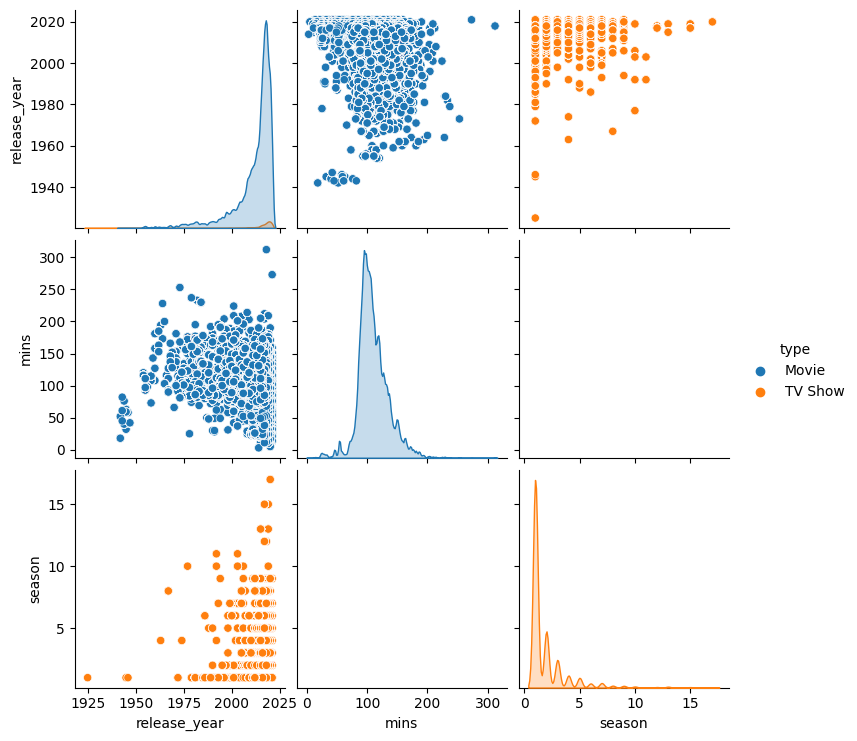

In [ ]:
sns.pairplot(data=pre_Data1,hue="type")

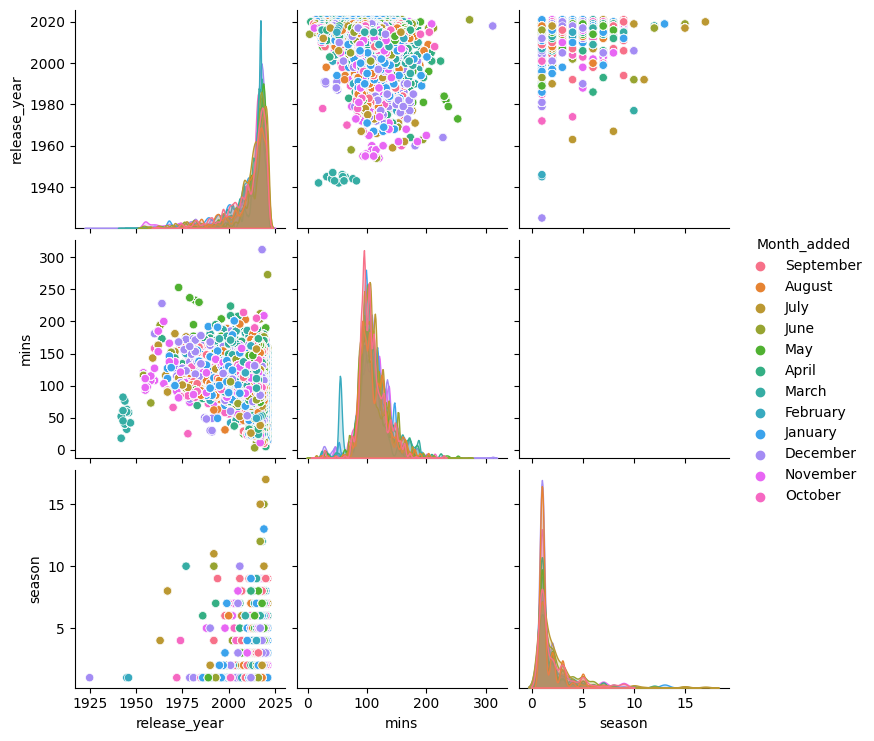

In [ ]:
sns.pairplot(data=pre_Data1,hue="Month_added")

In this example, we're using Seaborn's pairplot to create a pair plot for the 'Release_year','mins' and 'season' variables. However, since the dataset mainly contains categorical variables, this pair plot won't be very informative.


**Pair plots** are most useful when you have multiple numerical variables that you want to visualize together to explore relationships and correlations. If you have other numerical attributes in your dataset that you'd like to include in the pair plot, you can expand the numeric_attributes DataFrame to include those variables. Otherwise, consider using other visualization techniques more suitable for your dataset's characteristics.


To check for missing values in your dataset, you can use the **isnull()** function followed by the **sum()** function to count the missing values in each column. Here's how you can do it:


In [ ]:
# missing values
missing_values  = data_copy.isnull().sum()
print(f"Number of Missing Values: {missing_values}")


Number of Missing Values: show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


This code will print the number of missing values in each column of your DataFrame. You can decide whether you want to treat missing values by filling them, dropping rows, or other methods based on the context and the specific attributes with missing data.


In [ ]:
def missing_data(df):
    miss_val=df.isnull().sum()

    miss_per=miss_val/len(df)*100
    miss_val_table=pd.concat([miss_val,miss_per,df.dtypes],axis=1)
    miss_val_table=miss_val_table.rename(columns={0:"Missing_value_count",1:"Missing_value_percentage(%)",2:"Data Type"})
    return miss_val_table

In [ ]:
# Percertange for missing values
missing_data(data_copy)


,Missing_value_count,Missing_value_percentage(%),Data Type
show_id,0,0.000000,object
type,0,0.000000,category
title,0,0.000000,object
director,2634,29.908028,object
cast,825,9.367549,object
country,831,9.435676,category
date_added,10,0.113546,object
release_year,0,0.000000,int64
rating,4,0.045418,category
duration,3,0.034064,object


### Comments on the Range of Attributes :
- The dataset consists of both categorical and numerical attributes, such as type(categorical), rating(categorical), country(categorical), listed_in(categorical) and release_year(numerical) and duration(numerical) represents the durations of content

- Categorical attributes like 'Country' 'cast' 'directors' has wide range of unique values
- The date_added attribute represents the date when content is added to netflix and is in datetime format

### Comments on the Distribution of variables and relationships between them:
- The distribution of content ratings ('Rating') shows that 'TV-MA' is the most common rating, followed by 'TV-14' and 'TV-PG.'
- There is a broad range of release years ('Release_year'), spanning from earlier years to recent years.
- The distribution of the 'Duration' variable varies between movies (in minutes) and TV shows (in terms of the number of seasons).
- Relationships between variables can be explored further, such as examining the distribution of content ratings for movies versus TV shows.

### Comments for Each Univariate and Bivariate Plot:
- In the count plot of 'Type' vs. 'Rating,' it's evident that 'TV-MA' content is the most common for both movies and TV shows. 'TV-14' and 'TV-PG' are also prevalent ratings for both types of content.
- The box plot comparing 'Release_year' and 'Type' shows that movies have a broader range of release years compared to TV shows.
- The distribution plot (histogram) of 'Release_year' provides insights into the distribution of content over the years, with peaks in different time periods.
- The box plot for 'Rating' helps visualize the distribution and spread of content ratings. It shows that 'TV-MA' has a wide range, 'TV-14' is also diverse, while 'TV-PG' is comparatively more consistent in terms of content.
- The count plot of 'Type' and 'Rating' helps to understand the distribution of content ratings for movies and TV shows. It shows that 'TV-MA' is common in both, but the distribution of other ratings may differ between the two types.
- The box plot comparing 'Release_year' and 'Type' reveals that movies tend to have more diverse release years, while TV shows have a relatively narrower range, with some potential outliers.
- The count plot comparing 'Type' and 'Country' shows the distribution of content types by country, helping to identify which countries contribute more to Netflix's library.
- These insights provide a general understanding of the dataset's attributes and their distributions. Further analysis and domain-specific questions can lead to more detailed and actionable insights for decision-making or content recommendation systems on Netflix.




### Content Distribution and Popularity:

- The dataset reveals that 'TV-MA' is a popular content rating on Netflix, which suggests that mature and edgier content may resonate with the audience.
'TV-14' and 'TV-PG' content ratings also have a significant presence, indicating a diverse audience with varying age groups.
### Content Library Diversity:

- Netflix's content library is diverse, with content originating from various countries. This diversity reflects Netflix's commitment to offering a wide range of international content.
### Content Release Trends:

- The distribution of content release years shows that Netflix has content spanning across several decades, suggesting a focus on offering both classic and recent content.
### Movie and TV Show Distribution:

- The analysis indicates that Netflix's library includes both movies and TV shows. Movies are often more diverse in terms of their release years, while TV shows may have a more consistent distribution of release years.
### Influential Directors and Actors:

- The dataset can be used to identify influential directors and actors/actresses whose work is available on Netflix. Insights about the popularity of specific talent can inform casting and acquisition decisions.
### Content Recommendation and Personalization:

- Understanding user preferences based on content type, rating, and genre can aid in improving content recommendation algorithms and personalization to enhance user engagement.
### Content Localization:

- The dataset provides insights into the popularity of content from different countries. Netflix can use this information to prioritize content localization efforts.
### Content Acquisition Strategy:

- By analyzing the release years and types of content, Netflix can refine its acquisition strategy, targeting specific genres or eras that align with audience preferences.
### Content Licensing and Expiration:

- The 'Date_added' attribute can help manage content licensing and expiration dates, ensuring that popular titles remain available to subscribers.
### Content Quality and User Engagement:
- The dataset can be used to identify patterns in content quality, helping Netflix invest in content that engages users and attracts new subscribers.